In [1]:
import copy, math;
import numpy as np;
import matplotlib.pyplot as plt;
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

In [2]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]);

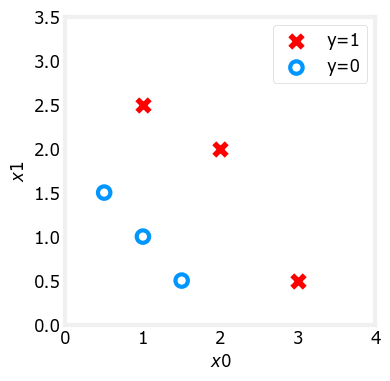

In [6]:
fig, ax  = plt.subplots(1,1,figsize=(4,4));
plot_data(x_train, y_train, ax);
ax.axis([0, 4, 0, 3.5]);
ax.set_xlabel("$x0$",fontsize=12);
ax.set_ylabel("$x1$", fontsize=12);
plt.show();

In [16]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape;
    dj_dw = np.zeros((n,));
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w)+b);
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i*X[i,j]
        dj_db = dj_db + err_i
    dj_db = dj_db/m;
    dj_dw = dj_dw/m;
    
    return dj_db, dj_dw;

In [17]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [18]:
def gradient_descent(X, y, w_in, b_in, alpha, numiters):
    j_history = []
    w = copy.deepcopy(w_in);
    b = b_in;
    
    for i in range(numiters):
        dj_db, dj_dw = compute_gradient_logistic(X,y,w,b);
        w = w - alpha * dj_dw;
        b = b - alpha * dj_db;
        
        if(i<10000):
            j_history.append(compute_cost_logistic(X, y, w, b));
        if i % math.ceil(numiters/10)==0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]}")
    return w,b,j_history;
    

In [19]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870457
Iteration 2000: Cost 0.08460064176930078
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.04290759421682
Iteration 5000: Cost 0.03433847729884557
Iteration 6000: Cost 0.02860379802212006
Iteration 7000: Cost 0.02450156960879306
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837


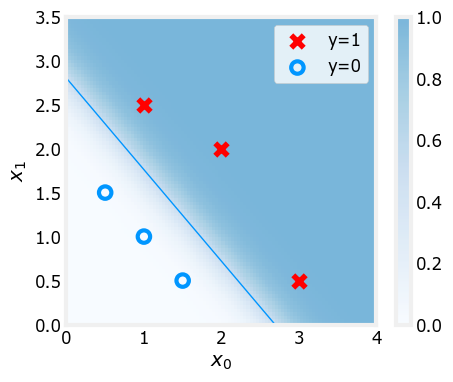

In [20]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(x_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()